# T1.1: MNIST

## mnist_cnn.py


ssh -o ProxyCommand="ssh -g -L 8889:localhost:8889 s4451856@sshgw.leidenuniv.nl -q -W U0065090:22" -g -L 8889:localhost:8889 s4451856@U0065090

In [2]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

2024-10-31 11:48:15.796269: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 11:48:15.871119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-31 11:48:15.880173: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-31 11:48:15.882621: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-31 11:48:15.889394: I tensorflow/core/platform/cpu_feature_guar

In [3]:
batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730371722.903465 2720134 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730371723.523771 2720134 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730371723.5240

Epoch 1/50


I0000 00:00:1730371725.572850 2720272 service.cc:146] XLA service 0x7fec7c0040c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730371725.572868 2720272 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-10-31 11:48:45.585180: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-31 11:48:45.734231: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-31 11:48:45.813851: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

 65/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0799 - loss: 2.3149

I0000 00:00:1730371727.541495 2720272 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0964 - loss: 2.3055 - val_accuracy: 0.2849 - val_loss: 2.2624
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2005 - loss: 2.2581 - val_accuracy: 0.4256 - val_loss: 2.2062
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3021 - loss: 2.2041 - val_accuracy: 0.5622 - val_loss: 2.1346
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3986 - loss: 2.1325 - val_accuracy: 0.6418 - val_loss: 2.0356
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4734 - loss: 2.0353 - val_accuracy: 0.6847 - val_loss: 1.9018
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5231 - loss: 1.9097 - val_accuracy: 0.7068 - val_loss: 1.7314
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5611 - loss: 1.7570 - val_accuracy: 0.7251 - val_loss: 1.5322
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5982 - loss: 1.5779 - val_accuracy: 0.7527 - val_

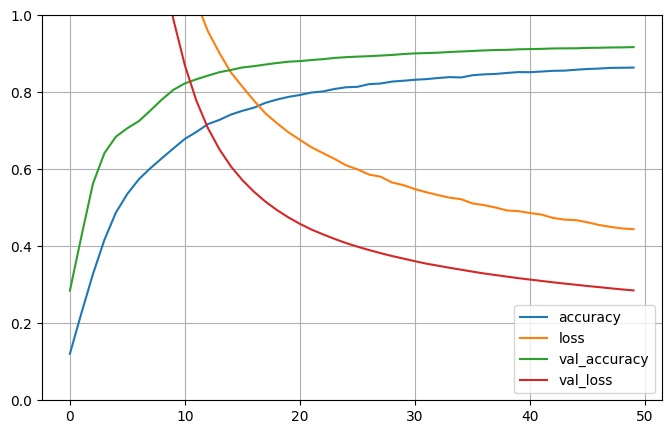

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## mnist_mlp.py


In [5]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [6]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.4473

2024-10-31 11:50:08.389042: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 12 bytes spill stores, 12 bytes spill loads

2024-10-31 11:50:08.411044: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 184 bytes spill stores, 184 bytes spill loads

2024-10-31 11:50:08.412981: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 336 bytes spill stores, 288 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8588 - loss: 0.4469 - val_accuracy: 0.9611 - val_loss: 0.1263
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9666 - loss: 0.1093 - val_accuracy: 0.9755 - val_loss: 0.0820
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9771 - loss: 0.0733 - val_accuracy: 0.9753 - val_loss: 0.0777
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9817 - loss: 0.0576 - val_accuracy: 0.9766 - val_loss: 0.0734
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9847 - loss: 0.0459 - val_accuracy: 0.9812 - val_loss: 0.0641
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9879 - loss: 0.0388 - val_accuracy: 0.9807 - val_loss: 0.0664
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9818 - val_loss: 0.0723
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9911 - loss: 0.0249 - val_accuracy: 0.9821 - val_

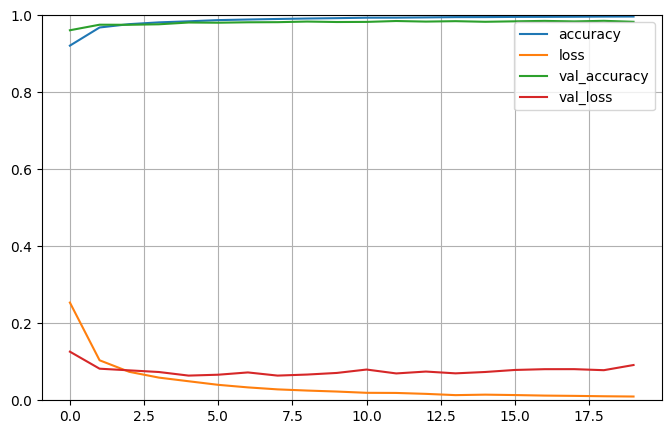

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# T1.2: Fashion MNIST

## (a) Multi-Layer Perceptron

In [8]:
import os
from keras import regularizers
os.environ["KERAS_BACKEND"] = "tensorflow"

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

classNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


def MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5):

  MLPModel = Sequential()
  MLPModel.add(keras.layers.Flatten(input_shape=[28, 28]))

  for i in range(hiddenLayers):
    MLPModel.add(keras.layers.Dense(300, activation=hiddenActivation))
    
    MLPModel.add(keras.layers.Dense(100, activation=hiddenActivation))


  MLPModel.add(keras.layers.Dense(10, activation=outputActivation))

  MLPModel.compile(loss="sparse_categorical_crossentropy",
  optimizer=optimiser,
  metrics=["accuracy"])

  history = MLPModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

  test_loss, test_acc = MLPModel.evaluate(xTest,  yTest, verbose=2)
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc

## (b) Convolutional Neural Network

In [9]:
def CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 convActivation="relu",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5,
                 inputShape=(28, 28, 1),
                 outputShape=10):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(32, (3, 3), activation=convActivation, input_shape=inputShape))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(64, activation=hiddenActivation))

  CNNModel.add(Dense(outputShape, activation=outputActivation))

  CNNModel.compile(optimizer=optimiser,
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  CNNModel.summary()
  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

  print(CNNModel.predict(xVal))

  val_loss, val_acc = CNNModel.evaluate(xVal,  yVal, verbose=2)
  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Conv Activation: {convActivation}")
  #print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_acc}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc, val_acc

## Experimentation and Evaluation

### MLP Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 1

Optimiser: Adam

Output Activation: SoftPlus

Hidden Activation: Tanh

Alpha:  5

Epochs: 30

Test accuracy: 0.8705999851226807

In [10]:
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

# MLP model eval
# Epochs
bestEpochs = (50, 0)
#for epochs in [20, 25, 30, 35, 40, 45, 50]:
  #accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest, epochs=epochs)

  #if accuracy > bestEpochs[1]:
    #bestEpochs = (epochs, accuracy)

  #else:
    #break


# Optimiser
bestOptimiser = ("Adam", 0)
#for optimiser in ["SGD",
#                  "RMSprop",
#                  "Adam",
#                  "AdamW",
#                  "Adadelta",
#                  "Adagrad",
#                  "Adamax",
#                  "Adafactor",
#                  "Nadam",
#                  "Ftrl",
#                  "Lion"]:
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          epochs=bestEpochs[0],
#                          optimiser=optimiser)

#  if accuracy > bestOptimiser[1]:
#    bestOptimiser = (optimiser, accuracy)


# Output activation function
bestOutActivation = ("softplus", 0)
#for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
#                   "tanh", "selu", "elu", "exponential"]:
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          outputActivation=activation,
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if accuracy > bestOutActivation[1]:
#    bestOutActivation = (activation, accuracy)


# Hidden Layer activation function
bestHiddenActivation = ("tanh", 0)
#for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
#                   "tanh", "selu", "elu", "exponential"]:
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=activation,
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if accuracy > bestHiddenActivation[1]:
#    bestHiddenActivation = (activation, accuracy)


# Hidden Layers
bestHidden = (1, 0)
#accuracyList = []
#for layers in range(1, 50):
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          hiddenLayers=layers,
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=bestHiddenActivation[0],
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])
  
#  accuracyList.append(accuracy)

#  if accuracy > bestHidden[1]:
#    bestHidden = (layers, accuracy)


# Regularisations
bestAlpha = (0, 0)
#alphas = np.logspace(-10, -2, 200)
#for alpha in alphas:
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          hiddenLayers=bestHidden[0],
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=bestHiddenActivation[0],
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0],
#                          alpha=alpha)

#  if accuracy > bestAlpha[1]:
#    bestAlpha = (alpha, accuracy)

print(f"Best Hidden layers: {bestHidden[0]}")
print(f"Best Optimiser: {bestOptimiser[0]}")
print(f"Best Output Activation: {bestOutActivation[0]}")
print(f"Best Hidden Activation: {bestHiddenActivation[0]}")
print(f"Best Epochs: {bestEpochs[0]}")
print(f"Final Test accuracy: {bestHidden[1]}")

plt.figure()
plt.plot(accuracyList, range(len(accuracyList)))
plt.show()


Best Hidden layers: 1
Best Optimiser: Adam
Best Output Activation: softplus
Best Hidden Activation: tanh
Best Epochs: 50
Final Test accuracy: 0


NameError: name 'accuracyList' is not defined

<Figure size 640x480 with 0 Axes>

### CNN Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 2

Optimiser: Adamax

Output Activation: elu

Hidden Activation: sigmoid

Conv Activation: relu

Epochs: 30

Test loss: 0.3733844459056854

Test accuracy: 0.8733000159263611

In [36]:
# CNN model eval
# Epochs
bestEpochs = (30, 0, 0)
#for epochs in [20, 25, 30, 35, 40, 45, 50]:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest, epochs=epochs)

#  if val_acc > bestEpochs[2]:
#    bestEpochs = (epochs, test_acc, val_acc)

#  else:
#    break

# Optimiser
bestOptimiser = ("Adamax", 0, 0)
#for optimiser in ["SGD",
#                  "RMSprop",
#                  "Adam",
#                  "AdamW",
#                  "Adadelta",
#                  "Adagrad",
#                  "Adamax",
#                  "Adafactor",
#                  "Nadam",
#                  "Ftrl",
#                  "Lion"]:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          epochs=bestEpochs[0],
#                          optimiser=optimiser)

#  if val_acc > bestOptimiser[2]:
#    bestOptimiser = (optimiser, test_acc, val_acc)


# Output activation function
bestOutActivation = ("elu", 0, 0)
#for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
#                   "tanh", "selu", "elu", "exponential"]:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          outputActivation=activation,
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if val_acc > bestOutActivation[2]:
#    bestOutActivation = (activation, test_acc, val_acc)


# Hidden Layer activation function
bestHiddenActivation = ("sigmoid", 0, 0)
#for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
#                   "tanh", "selu", "elu", "exponential"]:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=activation,
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if val_acc > bestHiddenActivation[2]:
#    bestHiddenActivation = (activation, test_acc, val_acc)


# Hidden Layer activation function
bestConvActivation = ("relu", 0, 0)
#for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
#                   "tanh", "selu", "elu", "exponential"]:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=bestHiddenActivation[0],
#                          convActivation=activation,
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if val_acc > bestConvActivation[2]:
#    bestConvActivation = (activation, test_acc, val_acc)


# Hidden Layers
bestHidden = (2, 0, 0)
#for layers in range(1, 10):
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          hiddenLayers=layers,
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=bestHiddenActivation[0],
#                          convActivation=bestConvActivation[0],
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0])

#  if val_acc > bestHidden[2]:
#    bestHidden = (layers, test_acc, val_acc)

#  else:
#    break


# Regularisations
bestAlpha = (0, 0, 0)
#alphas = np.logspace(-10, -2, 100)
#for alpha in alphas:
#  test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          hiddenLayers=bestHidden[0],
#                          outputActivation=bestOutActivation[0],
#                          hiddenActivation=bestHiddenActivation[0],
#                          convActivation=bestConvActivation[0],
#                          epochs=bestEpochs[0],
#                          optimiser=bestOptimiser[0],
#                          alpha=alpha)

#  if val_acc > bestAlpha[2]:
#    bestAlpha = (alpha, test_acc, val_acc)

print(f"Best Hidden layers: {bestHidden[0]}")
print(f"Best Optimiser: {bestOptimiser[0]}")
print(f"Best Output Activation: {bestOutActivation[0]}")
print(f"Best Hidden Activation: {bestHiddenActivation[0]}")
print(f"Best Convolutional Activation: {bestConvActivation[0]}")
print(f"Best Epochs: {bestEpochs[0]}")
print(f"Final Test accuracy: {bestHidden[1]}")

Best Hidden layers: 2
Best Optimiser: Adamax
Best Output Activation: elu
Best Hidden Activation: sigmoid
Best Convolutional Activation: relu
Best Epochs: 30
Final Test accuracy: 0


: 

: 

### CIFAR-10

In [37]:
cifar = keras.datasets.cifar10
(xTrainFull, yTrainFull), (xTest, yTest) = cifar.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

: 

: 

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2329 - loss: 2.0805 - val_accuracy: 0.4034 - val_loss: 1.6678
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4192 - loss: 1.6174 - val_accuracy: 0.4642 - val_loss: 1.4793
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4798 - loss: 1.4379 - val_accuracy: 0.5000 - val_loss: 1.4002
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5187 - loss: 1.3381 - val_accuracy: 0.5450 - val_loss: 1.2606
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5521 - loss: 1.2502 - val_accuracy: 0.5806 - val_loss: 1.1834
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5832 - loss: 1.1692 - val_accuracy: 0.6220 - val_loss: 1.0957
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6098 - loss: 1.0943 - val_accuracy: 0.6186 - val_loss: 1.0792
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6335 - loss: 1.0326 - 

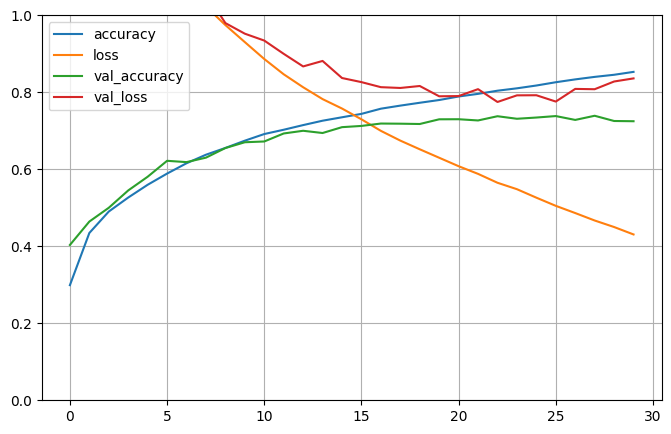

157/157 - 0s - 454us/step - accuracy: 0.7248 - loss: 0.8360
313/313 - 1s - 2ms/step - accuracy: 0.5291 - loss: 1.8939
Hidden layers: 2
Optimiser: adamax
Output Activation: elu
Hidden Activation: sigmoid
Conv Activation: relu
Alpha: 5
Epochs: 30
Validation loss: 0.8360478281974792
Validation accuracy: 0.7247999906539917
Test loss: 1.8938781023025513
Test accuracy: 0.5291000008583069
0.5291000008583069 0.7247999906539917


: 

: 

In [38]:
#Hidden layers: 2
#Optimiser: Adamax
#Output Activation: elu
#Hidden Activation: sigmoid
#Conv Activation: relu
#Epochs: 30
#Test loss: 0.3733844459056854
#Test accuracy: 0.8733000159263611

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="elu",
                          hiddenActivation="sigmoid",
                          convActivation="relu",
                          epochs=30,
                          optimiser="adamax",
                          inputShape=(32, 32, 3))

print(test_acc, val_acc)

# T2.1 Tell-the-time Network

## (a) Classification

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int(time[0] + (time[1] // 30)) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)



test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="softmax",
                          hiddenActivation="relu",
                          convActivation="relu",
                          epochs=30,
                          optimiser="adam",
                          inputShape=(75, 75, 1),
                          outputShape=24)

print(test_acc, val_acc)

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 73, 73, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │       921,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 983,128 (3.75 MB)

 Trainable params: 983,128 (3.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0794 - loss: 2.6548 - val_accuracy: 0.0983 - val_loss: 2.5503
Epoch 2/30
343/450 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0792 - loss: 2.5582

KeyboardInterrupt: 

## (b) Regression

In [13]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([float(time[0] + (time[1] / 60)) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

print(xTrain, yTrain)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=1,
                          outputActivation="elu",
                          hiddenActivation="sigmoid",
                          convActivation="relu",
                          epochs=30,
                          optimiser="adamax",
                          inputShape=(75, 75, 1),
                          outputShape=1)

print(test_acc, val_acc)

[[[[0.49019608]
   [0.58039216]
   [0.55294118]
   ...
   [0.38823529]
   [0.30196078]
   [0.3372549 ]]

  [[0.6       ]
   [0.46666667]
   [0.50588235]
   ...
   [0.40392157]
   [0.34117647]
   [0.36078431]]

  [[0.48627451]
   [0.54901961]
   [0.59607843]
   ...
   [0.32156863]
   [0.36078431]
   [0.38431373]]

  ...

  [[0.50980392]
   [0.46666667]
   [0.59215686]
   ...
   [0.38823529]
   [0.35294118]
   [0.41568627]]

  [[0.52941176]
   [0.60784314]
   [0.51372549]
   ...
   [0.39215686]
   [0.49411765]
   [0.37254902]]

  [[0.41568627]
   [0.58823529]
   [0.5372549 ]
   ...
   [0.22745098]
   [0.41568627]
   [0.4745098 ]]]


 [[[0.35294118]
   [0.36078431]
   [0.37254902]
   ...
   [0.37254902]
   [0.37647059]
   [0.41960784]]

  [[0.35294118]
   [0.35294118]
   [0.34901961]
   ...
   [0.36470588]
   [0.35294118]
   [0.37647059]]

  [[0.4       ]
   [0.34901961]
   [0.35686275]
   ...
   [0.39607843]
   [0.32941176]
   [0.36470588]]

  ...

  [[0.36862745]
   [0.34901961]
   [0.3

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 73, 73, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       921,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 977,473 (3.73 MB)

 Trainable params: 977,473 (3.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0010 - loss: nan - val_accuracy: 0.0017 - val_loss: nan
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0012 - loss: nan - val_accuracy: 0.0017 - val_loss: nan
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0013 - loss: nan - val_accuracy: 0.0017 - val_loss: nan
Epoch 4/30
208/450 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0021 - loss: nan

KeyboardInterrupt: 